# Background

This file loads the bike and train routes, and plots them on a blank matplotlib file. This is in order to generate a simple svg route which can be used in many places.

In [1]:
import gpxpy
import matplotlib.pyplot as plt

## Import bike routes

In [2]:
bike_route_names = [
    "BHM_TO_STR",
    "BIC_TO_BED",
    "BED_TO_SAN"
]
bike_routes = {}
for route_name in bike_route_names:
    gpx_file = open(f"../data/bike/{route_name}.gpx", 'r')
    gpx = gpxpy.parse(gpx_file)
    bike_routes[route_name] = gpx.tracks[0].segments[0].points

## Import train routes

In [3]:
train_route_names = [
    "STR_TO_LEA",
    "LEA_TO_BIC",
    "SAN_TO_CAM"
]
train_routes = {}
for route_name in train_route_names:
    gpx_file = open(f"../data/train/{route_name}.gpx", 'r')
    gpx = gpxpy.parse(gpx_file)
    train_routes[route_name] = gpx.tracks[0].segments[0].points

## Plot

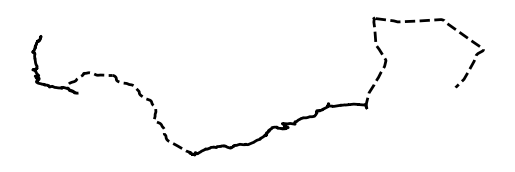

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

for route_name, route in bike_routes.items():
    xs = [point.longitude for point in route]
    ys = [point.latitude for point in route]
    ax.plot(xs, ys, 'k-', lw=2)

for route_name, route in train_routes.items():
    xs = [point.longitude for point in route]
    ys = [point.latitude for point in route]
    ax.plot(xs, ys, 'k--', lw=2)

ax.set_aspect('equal')
plt.axis('off')
plt.show(block=False)
fig.patch.set_visible(False)
fig.savefig('../images/route.svg', format='svg', dpi=1200, bbox_inches='tight')